<a href="https://colab.research.google.com/github/PacoElizondo/ComputerVisionUPT/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


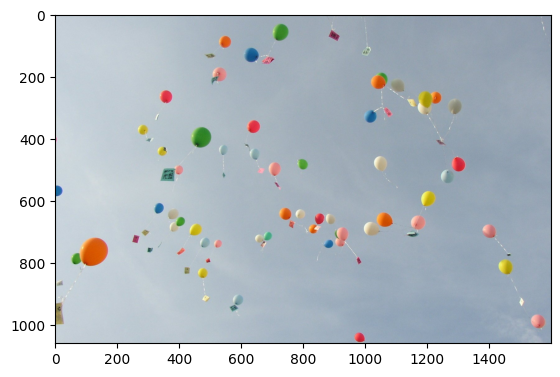

In [135]:
import skimage as sk
import os
import matplotlib.pyplot as plt
import numpy as np


path = '/content/drive/MyDrive/MasterCourses/UPT/ComputerVision/'
balloons = sk.io.imread(os.path.join(path,'baloons.jpg'))
fig = plt.figure()
plt.imshow(balloons)
plt.show()



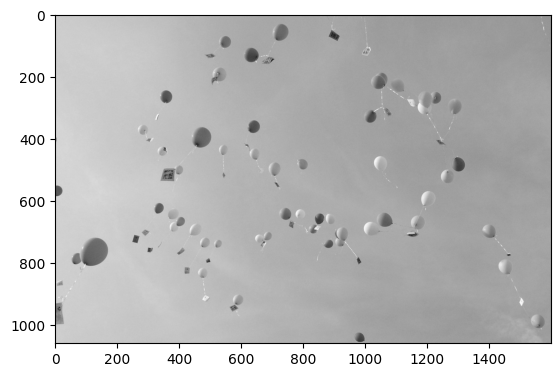

In [136]:
gray_balloons = sk.color.rgb2gray(balloons)
fig = plt.figure()
plt.imshow(gray_balloons, cmap='gray')
plt.show()

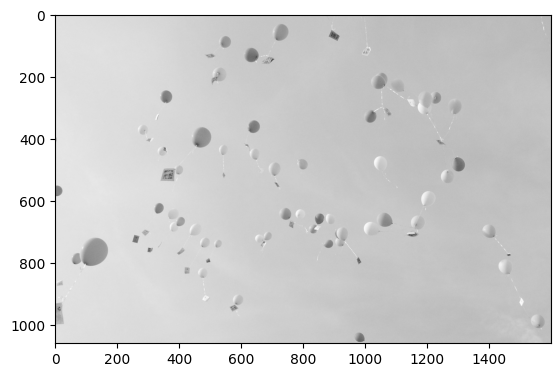

In [137]:
gamma_balloons = sk.exposure.adjust_gamma(gray_balloons, 0.5)
fig = plt.figure()
plt.imshow(gamma_balloons, cmap='gray')
plt.show()

In [138]:
thresh = sk.filters.threshold_otsu(gray_balloons)
print(thresh)

0.7109542057291668


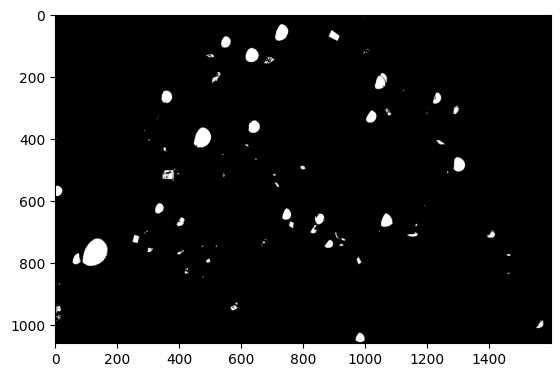

In [139]:
otsu_balloons = gamma_balloons < thresh
fig = plt.figure()
plt.imshow(otsu_balloons, cmap='gray')
plt.show()


number of regions is 177


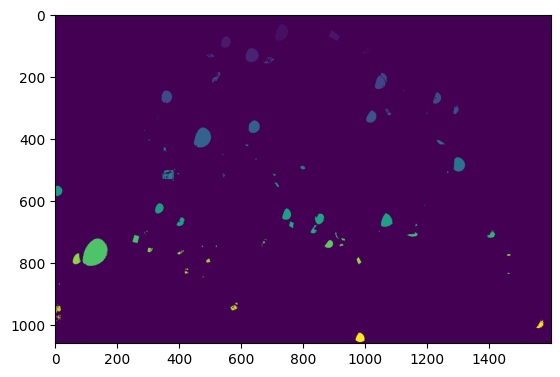

In [140]:
label_image, nregions = sk.measure.label(otsu_balloons,return_num=True)
# Labels pixels in groups (regions); if a pixel is neighbour to a previously labeled pixel,
# it gets the same label. If two regions merge when scanning the image, their labels become the same.

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

In [141]:
import pandas as pd

props = sk.measure.regionprops_table(label_image, properties=['label','area','eccentricity'])
df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,28.0,0.964091
1,2,39.0,0.983702
2,3,4.0,1.000000
3,4,6.0,1.000000
4,5,3.0,1.000000


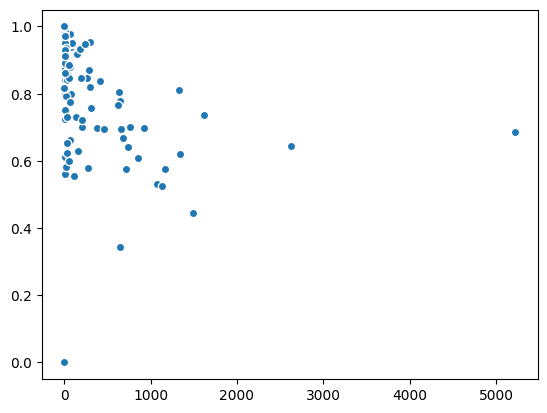

In [142]:
fig = plt.figure()

plt.scatter(x=df_features.area, y=df_features.eccentricity, marker='o', edgecolors='white')


In [143]:
n_balloons = np.array((df_features.area >= 500 ) & (df_features.eccentricity <= 0.8))
indices = np.where(n_balloons)[0]
print(indices)

[  6  10  12  16  39  46  54  55  67  76  96  97  99 100 101 127 145 176]


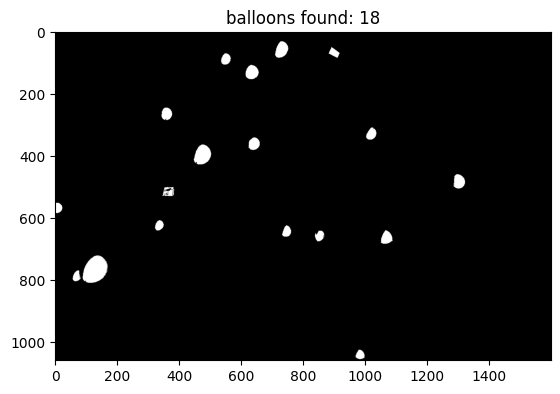

In [148]:
valid_balloons = df_features['label'][n_balloons].to_numpy()
balloon_mask = (label_image == valid_balloons[0])
for i in valid_balloons:
  balloon_mask |= (label_image == i)
true_balloons = label_image * balloon_mask
sharp_thresh = 0.01
sharp_balloons = true_balloons > thresh
fig = plt.figure()
plt.imshow(sharp_balloons, cmap='gray')
plt.title('balloons found: ' + str(indices.size))
plt.show()
